# Load points 

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from numpy import *
from sklearn.utils import resample

In [2]:
def readstl(name): 
    STLfile = name
    f=open(STLfile,'r')

    x=[]
    y=[]
    z=[]

    for line in f:
        strarray=line.split()
        if strarray[0]=='vertex':
            x=append(x,double(strarray[1]))
            y=append(y,double(strarray[2]))
            z=append(z,double(strarray[3]))
    
    
    # calculate middle point in every triangle
    xnew = []
    ynew = []
    znew = []

    for i in range(0,len(x),3):
        xnew.append(sum(x[i:i+3])/3)
        ynew.append(sum(y[i:i+3])/3)
        znew.append(sum(z[i:i+3])/3)
    
    print('# of points in %s:' %name, len(xnew))
    
    point = []
    for i in range(len(xnew)):
        point.append([xnew[i],ynew[i],znew[i]])
        
    return point

In [3]:
# draw the 3D graph to evaluate the resample points

def draw(points):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x,y,z = [],[],[]
    for point in points:
        x.append(point[0])
        y.append(point[1])
        z.append(point[2])
        
    ax.scatter(x, y, z, '.')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

# Calculate shape bins

In [4]:
# shape bins with every points

import numpy as np
def shape_bins(points):
    
    print('Calculating bins')
    
    N = len(points)
    bins_all = []
    theta_Block = 12
    phi_Block = 6
    dis_Block = 5
    for point_o in points[:]:
        distances = []
        theta = []
        phi = []
        for point in points[:]:
            distance = np.sqrt((point_o[0] - point[0]) ** 2 + (point_o[1] - point[1]) ** 2 + \
                               (point_o[2] - point[2]) ** 2 )
            if distance != 0:
                distances.append(distance)
                part_distance = np.sqrt((point[0] - point_o[0]) ** 2 + (point[1] - point_o[1]) ** 2)
                
                angl = np.arccos(np.abs(point[0] - point_o[0]) / part_distance)
                
                if point[1] - point_o[1] < 0 and point[0] - point_o[0] < 0:
                    angl = angl + np.pi
                elif point[1] - point_o[1] < 0 and point[0] - point_o[0] > 0:
                    angl = np.pi * 2 - angl
                elif point[1] - point_o[1] > 0 and point[0] - point_o[0] < 0:
                    angl = angl + np.pi / 2
                theta.append(angl)  
                
                phiangl = np.arccos(part_distance / distance)
                
                if point[2] - point_o[2] < 0:
                    phiangl = -1 * angl
                
                phi.append(phiangl)  
                
        mean_dist = np.mean(distances)
        distances = distances / mean_dist

        block_lens = 0.5
        distances_log = np.log(distances / block_lens)

        for x in range(len(distances_log)):
            if distances_log[x] <= 0:
                distances_log[x] = 0
            elif distances_log[x] <= 1:
                distances_log[x] = 1
            elif distances_log[x] <= 2:
                distances_log[x] = 2
            elif distances_log[x] <= 3:
                distances_log[x] = 3
            elif distances_log[x] <= 4:
                distances_log[x] = 4
        
        for x in range(len(phi)):
            if -np.pi/2 <= phi[x] <= -np.pi/3:
                phi[x] = 0
            elif -np.pi/3 < phi[x] <= -np.pi/6:
                phi[x] = 1
            elif -np.pi/6 < phi[x] <= 0:
                phi[x] = 2
            elif 0 < phi[x] <= np.pi/6:
                phi[x] = 3
            elif np.pi/6 < phi[x] <= np.pi/3:
                phi[x] = 4
            elif np.pi/3 < phi[x] <= np.pi/2:
                phi[x] = 5
                
        for x in range(len(theta)):
            if 0 < theta[x] <= np.pi/6:
                theta[x] = 0
            elif np.pi/6 < theta[x] <= np.pi/3:
                theta[x] = 1
            elif np.pi/3 < theta[x] <= np.pi/2:
                theta[x] = 2
            elif np.pi/2 < theta[x] <= 2*np.pi/3:
                theta[x] = 3
            elif 2*np.pi/3 < theta[x] <= 5*np.pi/6:
                theta[x] = 4
            elif 5*np.pi/6 < theta[x] <= np.pi:
                theta[x] = 5
            elif np.pi < theta[x] <= 7*np.pi/6:
                theta[x] = 6
            elif 7*np.pi/6 < theta[x] <= 4*np.pi/3:
                theta[x] = 7
            elif 4*np.pi/3 < theta[x] <= 3*np.pi/2:
                theta[x] = 8
            elif 3*np.pi/2 < theta[x] <= 5*np.pi/3:
                theta[x] = 9
            elif 5*np.pi/3 < theta[x] <= 11*np.pi/6:
                theta[x] = 10
            elif 11*np.pi/6 < theta[x] <= 2*np.pi:
                theta[x] = 11

        bins = np.zeros((dis_Block, theta_Block, phi_Block))
        for x in range(len(distances_log)):
            bins[int(distances_log[x]), int(theta[x]), int(phi[x])] =  \
            bins[int(distances_log[x]), int(theta[x]), int(phi[x])] + 1
            
        bins = np.reshape(bins,[phi_Block*theta_Block*dis_Block])
        bins_all.append(bins)
    return bins_all

In [5]:
# shape bins with centroid

def shape_centrobins(points):
    
    print('Calculating centroid bins')
    
    N = len(points)
    bins_all = []
    theta_Block = 12
    phi_Block = 6
    dis_Block = 5
    point_o = np.mean(points, axis = 0)
    
    distances = []
    theta = []
    phi = []
    for point in points[:]:
        distance = np.sqrt((point_o[0] - point[0]) ** 2 + (point_o[1] - point[1]) ** 2 + \
                           (point_o[2] - point[2]) ** 2 )
        if distance != 0:
            distances.append(distance)
            part_distance = np.sqrt((point[0] - point_o[0]) ** 2 + (point[1] - point_o[1]) ** 2)

            angl = np.arccos(np.abs(point[0] - point_o[0]) / part_distance)

            if point[1] - point_o[1] < 0 and point[0] - point_o[0] < 0:
                angl = angl + np.pi
            elif point[1] - point_o[1] < 0 and point[0] - point_o[0] > 0:
                angl = np.pi * 2 - angl
            elif point[1] - point_o[1] > 0 and point[0] - point_o[0] < 0:
                angl = angl + np.pi / 2
            theta.append(angl)  

            phiangl = np.arccos(part_distance / distance)

            if point[2] - point_o[2] < 0:
                phiangl = -1 * angl

            phi.append(phiangl)  

    mean_dist = np.mean(distances)
    distances = distances / mean_dist

    block_lens = 0.5
    distances_log = np.log(distances / block_lens)

    for x in range(len(distances_log)):
        if distances_log[x] <= 0:
            distances_log[x] = 0
        elif distances_log[x] <= 1:
            distances_log[x] = 1
        elif distances_log[x] <= 2:
            distances_log[x] = 2
        elif distances_log[x] <= 3:
            distances_log[x] = 3
        elif distances_log[x] <= 4:
            distances_log[x] = 4

    for x in range(len(phi)):
        if -np.pi/2 <= phi[x] <= -np.pi/3:
            phi[x] = 0
        elif -np.pi/3 < phi[x] <= -np.pi/6:
            phi[x] = 1
        elif -np.pi/6 < phi[x] <= 0:
            phi[x] = 2
        elif 0 < phi[x] <= np.pi/6:
            phi[x] = 3
        elif np.pi/6 < phi[x] <= np.pi/3:
            phi[x] = 4
        elif np.pi/3 < phi[x] <= np.pi/2:
            phi[x] = 5

    for x in range(len(theta)):
        if 0 < theta[x] <= np.pi/6:
            theta[x] = 0
        elif np.pi/6 < theta[x] <= np.pi/3:
            theta[x] = 1
        elif np.pi/3 < theta[x] <= np.pi/2:
            theta[x] = 2
        elif np.pi/2 < theta[x] <= 2*np.pi/3:
            theta[x] = 3
        elif 2*np.pi/3 < theta[x] <= 5*np.pi/6:
            theta[x] = 4
        elif 5*np.pi/6 < theta[x] <= np.pi:
            theta[x] = 5
        elif np.pi < theta[x] <= 7*np.pi/6:
            theta[x] = 6
        elif 7*np.pi/6 < theta[x] <= 4*np.pi/3:
            theta[x] = 7
        elif 4*np.pi/3 < theta[x] <= 3*np.pi/2:
            theta[x] = 8
        elif 3*np.pi/2 < theta[x] <= 5*np.pi/3:
            theta[x] = 9
        elif 5*np.pi/3 < theta[x] <= 11*np.pi/6:
            theta[x] = 10
        elif 11*np.pi/6 < theta[x] <= 2*np.pi:
            theta[x] = 11

    bins = np.zeros((dis_Block, theta_Block, phi_Block))
    for x in range(len(distances_log)):
        bins[int(distances_log[x]), int(theta[x]), int(phi[x])] =  \
        bins[int(distances_log[x]), int(theta[x]), int(phi[x])] + 1

    bins = np.reshape(bins,[phi_Block*theta_Block*dis_Block])
    bins_all.append(bins)
    return bins_all

# calculate Cost Matrix

In [6]:
def cost_matrix(bins_A,bins_B):
    print('Calculating cost matrix')
    
    row = 0
    col = 0
    cost = np.zeros((len(bins_A), len(bins_B)))
    for bin_A in bins_A:
        col = 0
        for bin_B in bins_B:
            cost[row, col] = 0.5 * np.sum(((bin_A - bin_B) ** 2) / (bin_A + bin_B + 0.00000001))
            col = col + 1
        row = row + 1

    return cost

# Munkres to find minimum

O(N^3) time complexity.

When the # of points increse, it will cost large amount of time.

We will use Soft Assignment method instead.

In [ ]:
import copy
from munkres import Munkres

In [ ]:
def cal_munkres(cost_matrix):
    print('Calculating munkres')
    matrix = copy.deepcopy(cost_matrix)
    m = Munkres()
    indexes = m.compute(matrix)
    total = 0
    
    for row, column in indexes:
        value = cost_matrix[row][column]
        total += value

    print ('minimum cost =%d' % total)
    return total

# Soft Assignment 

In [7]:
import copy

In [8]:
def soft_assign(cost_matrix):
    print('Calculating soft assignment')
    total = 0
    matrix = copy.deepcopy(cost_matrix)
    
    for i in range(len(cost_matrix)):
        candidate = []
        
        min_C = np.min(cost_matrix[i])
        max_C = np.max(cost_matrix[i])
        sigma_i = np.sqrt(np.sum((matrix[i] - min_C)**2))
        epsilon_i = sigma_i * np.abs(max_C - min_C)
        
        for j in range(len(cost_matrix[0])):
            if cost_matrix[i][j] <= min_C + epsilon_i:
                candidate.append(cost_matrix[i][j])       
        k_i = len(candidate)
    
        for k in range(k_i):
            weight_i = (min_C + epsilon_i - candidate[k])/(k_i * epsilon_i)
            total += weight_i * candidate[k]
    total /= len(cost_matrix)
    print('minimum cost =%d' % total)
    return total
            

# Main function using Hungarian method

Because of the time complexity of Munkres, 

we evaluate our results in the main function with SA

In [ ]:
# compare the different class
# find the dissimilarity between the two classes

result = []

for i in range(1,5):  
    for j in range(1,5):
        
        point1 = readstl('S%d.stl'%i)
        point2 = readstl('G%d.stl'%j)
        
        if len(point1) > 2000:
            point1 = resample(point1, replace=False, n_samples=2000,random_state=123)
        elif len(point1) < 2000:
            point1 = resample(point1, replace=True, n_samples=2000,random_state=123)
        
        if len(point2) > 2000:
            point2 = resample(point2, replace=False, n_samples=2000,random_state=123)
        elif len(point2) < 2000:
            point2 = resample(point2, replace=True, n_samples=2000,random_state=123)
        
        print('resample points to ',len(point1))

        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)

        cost = cost_matrix(bin1,bin2)

        total = cal_munkres(cost)
        
        result.append(total)

        print('---------------------')


In [ ]:
print(result)

In [ ]:
plt.plot(result)
plt.ylabel('minimum distance')
plt.ylim(0,max(result)*1.5)
 
plt.show()
print(np.mean(result))

In [ ]:
result2 = []
p = [1,2,3,4,5]

for i in range(1,6):  
    cur = []  
    q = p[:i-1] + p[i:]
    for j in q:
        
        point1 = readstl('G%d.stl'%i)[::80]
        point2 = readstl('G%d.stl'%j)[::80]

        if len(point1) > len(point2):
            point2 = resample(point2, replace=True, n_samples=len(point1),random_state=123)
        elif len(point1) < len(point2):
            point1 = resample(point1, replace=True, n_samples=len(point2),random_state=123)

        print('resample points to ',len(point1))


        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)

        cost = cost_matrix(bin1,bin2)

        total = cal_munkres(cost)
        
        cur.append(total)

        print('---------------------')
    
    result2.append(np.mean(cur))

# Main function using SA

## 1. using centriod

In this way, we only calculate the centrod point and its shape context.

Hence when we calculate cast_matrix, it will be 1x1 matrix and no need to using SA

# of points in S1.stl: 7558
# of points in G1.stl: 2934
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
390.096037418
---------------------
# of points in S1.stl: 7558
# of points in G2.stl: 12580
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
1133.8283336
---------------------
# of points in S1.stl: 7558
# of points in G3.stl: 11040
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
1032.77626327
---------------------
# of points in S1.stl: 7558
# of points in G4.stl: 1910
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
184.896910872
---------------------
# of points in S1.stl: 7558
# of points in G5.stl: 900
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
81.7913076754
---------------------
S1 cost with each Growing class: [390.09603741793217, 1133.8283336034003, 1032.7762632668998, 184.89691087249003, 81.79130767540056]
S1 mean cost with each Grow

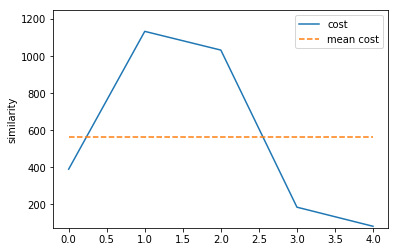

# of points in S2.stl: 14896
# of points in G1.stl: 2934
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
140.826104408
---------------------
# of points in S2.stl: 14896
# of points in G2.stl: 12580
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
404.16658254
---------------------
# of points in S2.stl: 14896
# of points in G3.stl: 11040
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
826.522584773
---------------------
# of points in S2.stl: 14896
# of points in G4.stl: 1910
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
196.406592074
---------------------
# of points in S2.stl: 14896
# of points in G5.stl: 900
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
88.3197707615
---------------------
S2 cost with each Growing class: [140.82610440796759, 404.16658253989061, 826.52258477251758, 196.40659207399506, 88.319770761533704]
S2 mean cost with eac

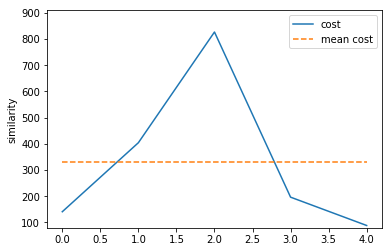

# of points in S3.stl: 806
# of points in G1.stl: 2934
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
270.142317923
---------------------
# of points in S3.stl: 806
# of points in G2.stl: 12580
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
210.947385449
---------------------
# of points in S3.stl: 806
# of points in G3.stl: 11040
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
236.725947665
---------------------
# of points in S3.stl: 806
# of points in G4.stl: 1910
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
222.346353103
---------------------
# of points in S3.stl: 806
# of points in G5.stl: 900
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
173.805420153
---------------------
S3 cost with each Growing class: [270.14231792335079, 210.94738544926162, 236.72594766496911, 222.34635310338768, 173.80542015337795]
S3 mean cost with each Growing

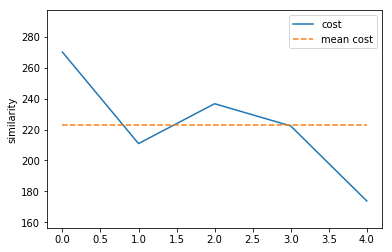

# of points in S4.stl: 2164
# of points in G1.stl: 2934
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
237.209913888
---------------------
# of points in S4.stl: 2164
# of points in G2.stl: 12580
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
193.06515804
---------------------
# of points in S4.stl: 2164
# of points in G3.stl: 11040
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
140.684272146
---------------------
# of points in S4.stl: 2164
# of points in G4.stl: 1910
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
334.291610262
---------------------
# of points in S4.stl: 2164
# of points in G5.stl: 900
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
106.277317295
---------------------
S4 cost with each Growing class: [237.20991388786337, 193.06515804015274, 140.68427214591929, 334.29161026155094, 106.27731729508723]
S4 mean cost with each Gro

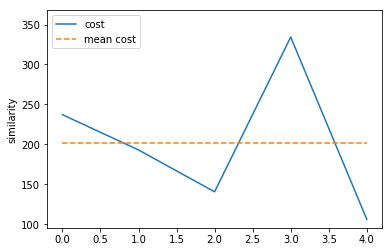

# of points in S5.stl: 706
# of points in G1.stl: 2934
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
145.461332509
---------------------
# of points in S5.stl: 706
# of points in G2.stl: 12580
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
145.655752456
---------------------
# of points in S5.stl: 706
# of points in G3.stl: 11040
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
126.098735575
---------------------
# of points in S5.stl: 706
# of points in G4.stl: 1910
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
151.320943502
---------------------
# of points in S5.stl: 706
# of points in G5.stl: 900
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
148.425465332
---------------------
S5 cost with each Growing class: [145.46133250928435, 145.65575245616895, 126.09873557487701, 151.32094350160096, 148.42546533193374]
S5 mean cost with each Growing

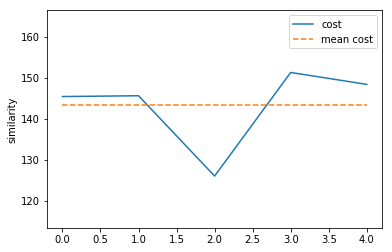

In [61]:
# Stable TO Growing

result = []
for i in range(1,6):
    cur = []
    for j in range(1,6):
        
        point1 = readstl('S%d.stl'%i)
        point2 = readstl('G%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        bin1 = shape_centrobins(point1)
        bin2 = shape_centrobins(point2)
        
        cost = cost_matrix(bin1,bin2)
        print(cost[0][0])
        result.append(cost[0][0])
        cur.append(cost[0][0])

        print('---------------------')
        
    print('S%d cost with each Growing class:'%i,cur)
    print('S%d mean cost with each Growing class:'%i,np.mean(cur))
    plt.figure()
    plt.plot(cur,label = 'cost')
    y=[np.mean(cur)]*5
    plt.plot(y,'--',label = 'mean cost')
    plt.ylabel('similarity')
    plt.ylim(min(cur)*0.9,max(cur)*1.1)
    plt.legend()
    plt.show()
        


Stable mean cost with Growing class: 292.883536508


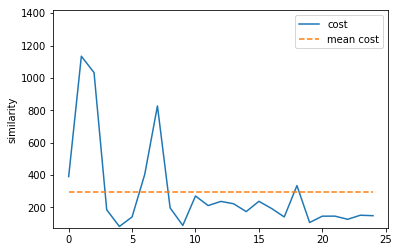

In [62]:
print('Stable mean cost with Growing class:',np.mean(result))
plt.figure()
plt.plot(result,label = 'cost')
y=[np.mean(result)]*25
plt.plot(y,'--',label = 'mean cost')
plt.ylabel('similarity')
plt.ylim(min(result)*0.9,max(result)*1.25)
plt.legend()
plt.show()

# of points in G1.stl: 2934
# of points in S1.stl: 7558
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
390.096037418
---------------------
# of points in G1.stl: 2934
# of points in S2.stl: 14896
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
140.826104408
---------------------
# of points in G1.stl: 2934
# of points in S3.stl: 806
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
270.142317923
---------------------
# of points in G1.stl: 2934
# of points in S4.stl: 2164
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
237.209913888
---------------------
# of points in G1.stl: 2934
# of points in S5.stl: 706
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
145.461332509
---------------------
G1 cost with each Stable class: [390.09603741793217, 140.82610440796759, 270.14231792335079, 237.20991388786337, 145.46133250928435]
G1 mean cost with each Stabl

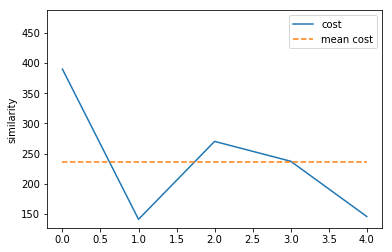

# of points in G2.stl: 12580
# of points in S1.stl: 7558
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
1133.8283336
---------------------
# of points in G2.stl: 12580
# of points in S2.stl: 14896
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
404.16658254
---------------------
# of points in G2.stl: 12580
# of points in S3.stl: 806
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
210.947385449
---------------------
# of points in G2.stl: 12580
# of points in S4.stl: 2164
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
193.06515804
---------------------
# of points in G2.stl: 12580
# of points in S5.stl: 706
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
145.655752456
---------------------
G2 cost with each Stable class: [1133.8283336034003, 404.16658253989061, 210.94738544926162, 193.06515804015274, 145.65575245616895]
G2 mean cost with each Sta

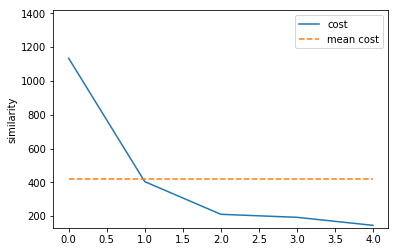

# of points in G3.stl: 11040
# of points in S1.stl: 7558
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
1032.77626327
---------------------
# of points in G3.stl: 11040
# of points in S2.stl: 14896
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
826.522584773
---------------------
# of points in G3.stl: 11040
# of points in S3.stl: 806
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
236.725947665
---------------------
# of points in G3.stl: 11040
# of points in S4.stl: 2164
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
140.684272146
---------------------
# of points in G3.stl: 11040
# of points in S5.stl: 706
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
126.098735575
---------------------
G3 cost with each Stable class: [1032.7762632668998, 826.52258477251758, 236.72594766496911, 140.68427214591929, 126.09873557487701]
G3 mean cost with each 

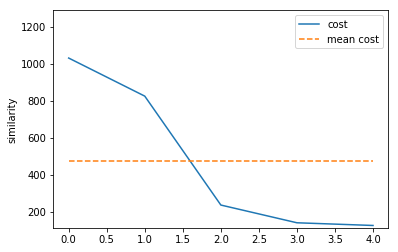

# of points in G4.stl: 1910
# of points in S1.stl: 7558
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
184.896910872
---------------------
# of points in G4.stl: 1910
# of points in S2.stl: 14896
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
196.406592074
---------------------
# of points in G4.stl: 1910
# of points in S3.stl: 806
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
222.346353103
---------------------
# of points in G4.stl: 1910
# of points in S4.stl: 2164
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
334.291610262
---------------------
# of points in G4.stl: 1910
# of points in S5.stl: 706
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
151.320943502
---------------------
G4 cost with each Stable class: [184.89691087249003, 196.40659207399506, 222.34635310338768, 334.29161026155094, 151.32094350160096]
G4 mean cost with each Stabl

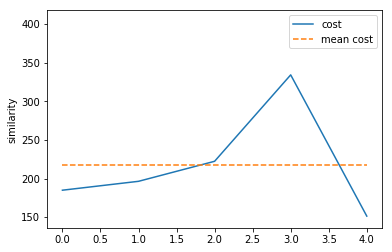

# of points in G5.stl: 900
# of points in S1.stl: 7558
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
81.7913076754
---------------------
# of points in G5.stl: 900
# of points in S2.stl: 14896
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
88.3197707615
---------------------
# of points in G5.stl: 900
# of points in S3.stl: 806
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
173.805420153
---------------------
# of points in G5.stl: 900
# of points in S4.stl: 2164
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
106.277317295
---------------------
# of points in G5.stl: 900
# of points in S5.stl: 706
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
148.425465332
---------------------
G5 cost with each Stable class: [81.79130767540056, 88.319770761533704, 173.80542015337795, 106.27731729508723, 148.42546533193374]
G5 mean cost with each Stable clas

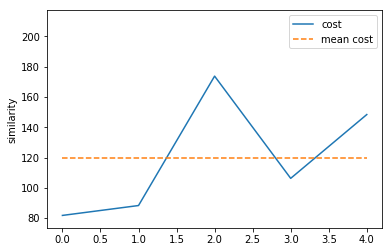

In [59]:
# Growing To Stable

result = []
for i in range(1,6):
    cur = []
    for j in range(1,6):
        
        point1 = readstl('G%d.stl'%i)
        point2 = readstl('S%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        bin1 = shape_centrobins(point1)
        bin2 = shape_centrobins(point2)
        
        cost = cost_matrix(bin1,bin2)
        print(cost[0][0])
        result.append(cost[0][0])
        cur.append(cost[0][0])

        print('---------------------')
        
    print('G%d cost with each Stable class:'%i,cur)
    print('G%d mean cost with each Stable class:'%i,np.mean(cur))
    plt.figure()
    plt.plot(cur,label = 'cost')
    y=[np.mean(cur)]*5
    plt.plot(y,'--',label = 'mean cost')
    plt.ylabel('similarity')
    plt.ylim(min(cur)*0.9,max(cur)*1.25)
    plt.legend()
    plt.show()

Growing mean cost with Stable class: 292.883536508


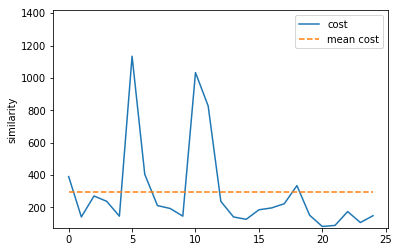

In [60]:
print('Growing mean cost with Stable class:',np.mean(result))
plt.figure()
plt.plot(result,label = 'cost')
y=[np.mean(result)]*25
plt.plot(y,'--',label = 'mean cost')
plt.ylabel('similarity')
plt.ylim(min(result)*0.9,max(result)*1.25)
plt.legend()
plt.show()

# of points in G1.stl: 2934
# of points in G2.stl: 12580
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
218.623921404
---------------------
# of points in G1.stl: 2934
# of points in G3.stl: 11040
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
211.40683023
---------------------
# of points in G1.stl: 2934
# of points in G4.stl: 1910
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
424.418224746
---------------------
# of points in G1.stl: 2934
# of points in G5.stl: 900
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
110.240258439
---------------------
# of points in G2.stl: 12580
# of points in G3.stl: 11040
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
596.091268545
---------------------
# of points in G2.stl: 12580
# of points in G4.stl: 1910
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
212.622685616
-----------

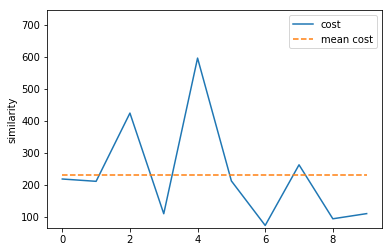

In [58]:
# Growing To Growing
cur = []
for i in range(1,6):
    for j in range(i+1,6):
        
        point1 = readstl('G%d.stl'%i)
        point2 = readstl('G%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        bin1 = shape_centrobins(point1)
        bin2 = shape_centrobins(point2)
        
        cost = cost_matrix(bin1,bin2)
        print(cost[0][0])
        cur.append(cost[0][0])

        print('---------------------')
        
print('Growing cost with each Growing class:',cur)
print('Growing mean cost with each Growing class:',np.mean(cur))
plt.figure()
plt.plot(cur,label = 'cost')
y=[np.mean(cur)]*len(cur)
plt.plot(y,'--',label = 'mean cost')
plt.ylabel('similarity')
plt.ylim(min(cur)*0.9,max(cur)*1.25)
plt.legend()
plt.show()

# of points in S1.stl: 7558
# of points in S2.stl: 14896
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
1664.10481149
---------------------
# of points in S1.stl: 7558
# of points in S3.stl: 806
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
178.907228887
---------------------
# of points in S1.stl: 7558
# of points in S4.stl: 2164
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
279.890394444
---------------------
# of points in S1.stl: 7558
# of points in S5.stl: 706
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
113.122632862
---------------------
# of points in S2.stl: 14896
# of points in S3.stl: 806
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
223.630705807
---------------------
# of points in S2.stl: 14896
# of points in S4.stl: 2164
Calculating centroid bins
Calculating centroid bins
Calculating cost matrix
216.190229841
--------------

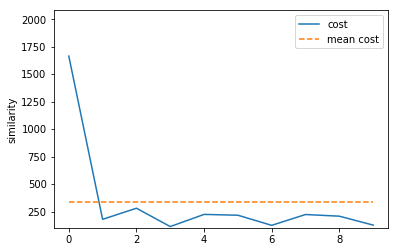

In [57]:
# Stable To Stable
cur = []
for i in range(1,6):
    for j in range(i+1,6):
        
        point1 = readstl('S%d.stl'%i)
        point2 = readstl('S%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        bin1 = shape_centrobins(point1)
        bin2 = shape_centrobins(point2)
        
        cost = cost_matrix(bin1,bin2)
        print(cost[0][0])
        cur.append(cost[0][0])

        print('---------------------')
        
print('Stabel cost with each Stabel class:',cur)
print('Stabel mean cost with each Stabel class:',np.mean(cur))
plt.figure()
plt.plot(cur,label = 'cost')
y=[np.mean(cur)]*len(cur)
plt.plot(y,'--',label = 'mean cost')
plt.ylabel('similarity')
plt.ylim(min(cur)*0.9,max(cur)*1.25)
plt.legend()
plt.show()

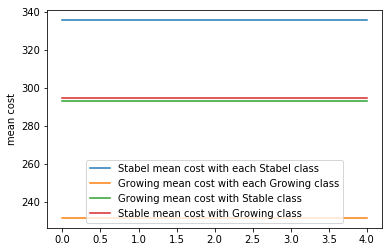

In [67]:
# plot each cost with the results we get in the former part

a = [335.657130427] * 5
b = [231.508987886] * 5
c = [292.883536508] * 5
d = [294.883536508] * 5
plt.figure()
plt.plot(a,label = 'Stabel mean cost with each Stabel class')
plt.plot(b,label = 'Growing mean cost with each Growing class')
plt.plot(c,label = 'Growing mean cost with Stable class')
plt.plot(d,label = 'Stable mean cost with Growing class')
plt.ylabel('mean cost')
plt.legend()
plt.show()

## 2. using every points

In [ ]:
result = []

for i in range(1,5):  
    for j in range(1,5):
        
        point1 = readstl('S%d.stl'%i)
        point2 = readstl('G%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        print('resample points1 to',len(point1))
        print('resample points2 to',len(point2))
        
        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)
        
        cost = cost_matrix(bin1,bin2)

        total = soft_assign(cost)
        
        result.append(total)

        print('---------------------')

In [ ]:
print(result)
plt.plot(result)
plt.ylabel('minimum distance')
plt.ylim(0,max(result)*1.5)
plt.show()
print(np.mean(result))

In [ ]:
result2 = []


for i in range(1,5):
    
    for j in range(i+1,5):
        
        point1 = readstl('G%d.stl'%i)
        point2 = readstl('G%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        print('resample points1 to',len(point1))
        print('resample points2 to',len(point2))

        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)

        cost = cost_matrix(bin1,bin2)

        total = soft_assign(cost)
        
        result2.append(total)

        print('---------------------')
    

In [ ]:
print(result2)
plt.plot(result2)
plt.ylabel('minimum distance')
plt.ylim(0,max(result2)*1.5)
plt.show()
print(np.mean(result2))

In [ ]:
result3 = []

for i in range(1,5):  
    for j in range(i+1,5):
        
        point1 = readstl('S%d.stl'%i)
        point2 = readstl('S%d.stl'%j)
        
        if len(point1) >= len(point2):
            n = len(point1)//len(point2)
            point1 = point1[::n]
        else:
            n = len(point2)//len(point1)
            point2 = point2[::n]
        
        print('resample points1 to',len(point1))
        print('resample points2 to',len(point2))

        bin1 = shape_bins(point1)
        bin2 = shape_bins(point2)

        cost = cost_matrix(bin1,bin2)

        total = soft_assign(cost)
        
        result3.append(total)

        print('---------------------')
    

In [ ]:
print(result3)
plt.plot(result3)
plt.ylabel('minimum distance')
plt.ylim(0,max(result3)*1.5)
plt.show()
print(np.mean(result3))

In [ ]:
# test stable one with each class

resultt1 = []

for i in range(1,5):  
        
    point1 = readstl('S5.stl')
    point2 = readstl('S%d.stl'%i)

    if len(point1) > 2000:
            point1 = resample(point1, replace=False, n_samples=2000,random_state=123)
    elif len(point1) < 2000:
        point1 = resample(point1, replace=True, n_samples=2000,random_state=123)

    if len(point2) > 2000:
        point2 = resample(point2, replace=False, n_samples=2000,random_state=123)
    elif len(point2) < 2000:
        point2 = resample(point2, replace=True, n_samples=2000,random_state=123)

    print('resample points to ',len(point1))

    draw(point1)
    draw(point2)

    bin1 = shape_bins(point1)
    bin2 = shape_bins(point2)

    cost = cost_matrix(bin1,bin2)

    total = soft_assign(cost)

    resultt1.append(total)

    print('---------------------')

In [ ]:

resultt2 = []

for i in range(1,5):  
        
    point1 = readstl('S5.stl')
    point2 = readstl('G%d.stl'%i)

    if len(point1) >= len(point2):
        n = len(point1)//len(point2)
        point1 = point1[::n]
    else:
        n = len(point2)//len(point1)
        point2 = point2[::n]

    print('resample points1 to',len(point1))
    print('resample points2 to',len(point2))

    draw(point1)
    draw(point2)

    bin1 = shape_bins(point1)
    bin2 = shape_bins(point2)

    cost = cost_matrix(bin1,bin2)

    total = soft_assign(cost)

    resultt2.append(total)

    print('---------------------')

In [ ]:
print(resultt1)
print(resultt2)
plt.plot(resultt1)
plt.plot(resultt2)
plt.ylabel('minimum distance')
plt.ylim(0,max(resultt1)*1.5)
plt.show()
print(np.mean(resultt1))
print(np.mean(resultt2))